#### <p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkGuidedProjectsIBMGPXX0R8TEN1287-2023-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Forecasting Crypto Portfolios Like a Quant**

Estimated time needed: **30** minutes

You are a seasoned investor who often uses Ethereum to purchase NFT on Opensea. You also think it is better not to put all your money in the same cryptocurrency; therefore, you decide to put your money in 8 different cryptocurrencies, like an ETF. Since the end of 2019, your portfolio has been doing great. Yet the economy has recently been heading into recession, and you want to know how to track your portfolio trends efficiently.

This tutorial will help you understand the cleaning of time series data and how the big financial companies create popular indexes like the S&P 500 or Nasdaq to track the industry. The project will also guide you how to determine what other critical external factors will influence your portfolio. You will use  ARIMA and SARIMAX models to predict your custom index performance. You will practice with the examples from <a href="https://coincodex.com/page/faq/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkGuidedProjectsIBMGPXX0R8TEN1287-2023-01-01">Coincodex</a> and <a href="https://home.treasury.gov/resource-center/data-chart-center/interest-rates/TextView?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkGuidedProjectsIBMGPXX0R8TEN1287-2023-01-01&type=daily_treasury_real_yield_curve&field_tdr_date_value_month=202211">United States Department of the Treasury</a>.


<img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-GPXX0R8TEN/images/bitcoin.jpg" width="600">

<font color=gray>*Image resource* :</font> <a href="https://pxhere.com/en/photo/1435009?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkGuidedProjectsIBMGPXX0R8TEN1287-2023-01-01">PxHere</a>


# **Table of Contents**

<ol>
    <li><a href="#Objectives">Objectives</a></li>
    <li>
        <a href="#Setup">Setup</a>
        <ol>
            <li><a href="#Installing-Required-Libraries">Installing Required Libraries</a></li>
            <li><a href="#Importing-Required-Libraries">Importing Required Libraries</a></li>
            <li><a href="#Importing-Required-Datasets">Importing Required Datasets</a></li>
            <li><a href="#Defining-Helper-Functions">Defining Helper Functions</a></li>
        </ol>
    </li>
    <li><a href="#Loading-Datasets">Loading Datasets</a></li>
    <li><a href="#Creating-Customize-Index">Creating Customize Index</a></li>
    <li><a href="#Time-Series-Forecasting">Time Series Forecasting</a>
        <ol>
            <li><a href="#What-Is-Time-Series?">What Is Time Series?</a></li>
            <li><a href="#How-The-Time-Series-Forecasting-Works?">How The Time Series Forecasting Works?</a></li>
            <li><a href="#Training-and-Testing-Sets">Training and Testing Sets</a></li>
            <li><a href="#Implementing-ARIMA-Model">Implementing ARIMA Model</a></li>
            <li><a href="#Implementing-SARIMAX-Model">Implementing SARIMAX Model</a></li>
        </ol>
    </li>
    <li><a href="#Exercises:-Forecasting-Your-Index-With-SARIMAX-Model">Exercises: Forecasting Your Index With SARIMAX Model</a></li>
    <li>
        <a href="#Optional:-Deeper-Understanding-of-Data-Preprocessing">Optional: Deeper Understanding of Data Preprocessing</a>
        <ol>
            <li><a href="#How-To-Clean-Missing-Values?">How To Clean Missing Values?</a></li>
            <li><a href="#How-To-Normalize-Variables?">How To Normalize Variables?</a></li>
            <li><a href="#How-To-Find-Correlation-Between-Variables?">How To Find Correlation Between Variables?</a></li>
        </ol>
    </li>
    <li><a href="#Optional:-Deeper-Understanding-of-Time-Series-Forecasting">Optional: Deeper Understanding of Time Series Forecasting</a>
        <ol>
            <li><a href="#How-To-Determine-Parameters-d?-Stationary-Detection">How To Determine Parameters d? Stationary Detection</a></li>
            <li><a href="#What-Is-ARIMA-Model?">What Is ARIMA Model?</a></li>
        </ol>
    </li>
 </ol>


# Objectives

 - **Understand** the basic knowledge of time series
 - **Know** your time series data and make raw data into a clean and prepared form
 - **Understand** the index formation
 - **Create** your own index
 - **Understand** the training process of time series
 - **Apply** ARIMA and SARIMAX models to forecast time series


----


# Setup

For this lab, we will be using the following libraries:

*   [`pandas`](https://pandas.pydata.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for managing the data.
*   [`numpy`](https://numpy.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for mathematical operations.
*   [`sklearn`](https://scikit-learn.org/stable/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for machine learning and machine-learning-pipeline related functions.
*   [`seaborn`](https://seaborn.pydata.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for visualizing the data.
*   [`matplotlib`](https://matplotlib.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for additional plotting tools.


## *Installing Required Libraries*

The following required libraries are pre-installed in the Skills Network Labs environment. However, if you run this notebook commands in a different Jupyter environment (e.g. Watson Studio or Ananconda), you will need to install these libraries by removing the `#` sign before `!mamba` in the code cell below.


In [ ]:
# All Libraries required for this lab are listed below. The libraries pre-installed on Skills Network Labs are commented.
# !mamba install -qy pandas==1.3.4 numpy==1.21.4 seaborn==0.9.0 matplotlib==3.5.0 scikit-learn==0.20.1
# Note: If your environment doesn't support "!mamba install", use "!pip install"

The following required libraries are __not__ pre-installed in the Skills Network Labs environment. __You will need to run the following cell__ to install them:


In [1]:
!pip install tqdm pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 44.3 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.0/302.0 kB 33.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.8/24.8 MB 48.0 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 78.7 MB/s eta 0:00:00:00:0100:01
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.20.1
    Uninstalling scikit-learn-0.20.1:
      Successfully uninstalled scikit-learn-0.20.1
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.12.0
    Uninstalling statsmodels-0.12.0:
      Successfully uninstalled statsmodels-0.12.0


## *Importing Required Libraries*

_We recommend you import all required libraries in one place (here):_


In [2]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import TimeSeriesSplit
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima.model import ARIMA
from os import listdir, getcwd
from os.path import isfile, join, basename
from pmdarima import auto_arima
from tqdm import tqdm
from zipfile import ZipFile
from typing import Awaitable
import asyncio
import skillsnetwork
import numpy as np
import pandas as pd
import glob
import seaborn as sns
sns.set_context('notebook')
sns.set_style('white')

import matplotlib.pyplot as plt
%matplotlib inline

import warnings
def warn(*args, **kwargs):
    pass # Suppress warnings generated by your code
warnings.warn = warn
warnings.filterwarnings('ignore')

## *Importing Required Datasets*

_This section will download and unzip the datasets:_


In [3]:
await skillsnetwork.prepare("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-GPXX0R8TEN/labs/data/cryptocurrency.zip",overwrite=True)

  0%|          | 0/31 [00:00<?, ?it/s]

Saved to '.'


## *Defining Helper Functions*

_Use this section to define any helper functions to help the notebook's code readability:_


In [5]:
def read_date_series_files(files, strat_time, end_time, join_type, col_read=None):
    folder = glob.glob(files)  # get files name
    dfs = pd.DataFrame(pd.date_range(start=strat_time, end=end_time, freq="d"), columns=["Date"])

    if join_type == "left":  # combine different columns from different files
        for f in folder:
            df = pd.read_csv(f, sep=",", header=0, usecols=col_read)
            df["Date"] = pd.to_datetime(df["Date"])
            dfs = dfs.merge(df, how=join_type, left_on="Date", right_on="Date")
            dfs.set_axis([*dfs.columns[:-1], basename(f).replace(".csv", "")], axis=1, inplace=True)
    elif join_type == "normal":  # combine same columns from different files
        df = [pd.read_csv(f, sep=",", header=0, usecols=col_read) for f in folder]
        dfs = pd.concat(df, ignore_index=True)
        dfs["Date"] = pd.to_datetime(dfs["Date"])

    dfs.set_index("Date", inplace=True)  # make the date become the index
    dfs = dfs.sort_index()
    return dfs


def find_first_date(df, display=False):
    global start_date, end_date
    i = df.isnull().sum().max()
    start_date = df.index[i]
    end_date = df.index[-1]
    if display:
        print("The first date in this time series is: ", start_date, "\n The last date in this time series is: ", end_date)


def clean_data(tv, pv):
    df1, df2 = tv.copy(), pv.copy()
    
    find_first_date(tv, True)
    df1 = df1[start_date:]

    df2 = df2[start_date:]
    df2.drop(["4 Mo"], axis=1, inplace=True)
    # fill missing datetime with previous day's values
    df2 = df2.reindex(pd.date_range(start_date, end_date)).reset_index().rename(columns={"index": "Date"})
    df2 = df2.groupby(df2["Date"].dt.time).ffill()
    df2.set_index("Date", inplace=True)
    return df1, df2


def prepare_data(dataset):
    df = dataset.copy()
    
    # normalized the data with min-max scaling
    df_nor = pd.DataFrame(MinMaxScaler().fit_transform(df)).assign(label=df.index)
    df_nor.columns = df.columns.to_list() + ["Date"]
    df_nor.set_index("Date", inplace=True)
    
    # we will remove the weak corellation (% between -0.2 to 0.2)
    cor = df_nor.corr(method="pearson")
    df_nor.drop(df_nor.columns[(cor.Index >= -0.2) & (cor.Index <= 0.2)], axis=1, inplace=True)
    return df_nor


def time_series_split(df, train_percent):
    train_size = int(len(df) * train_percent)
    predictor_train, target_train = pd.DataFrame(df.iloc[:train_size, :-1]), pd.DataFrame(df.iloc[:train_size, -1])
    predictor_test, target_test = pd.DataFrame(df.iloc[train_size:, :-1]), pd.DataFrame(df.iloc[train_size:, -1])
    return predictor_train, predictor_test, target_train, target_test


def decompose(df, period):
    decomposition = seasonal_decompose(df, model="additive", period=period)

    fig, axs = plt.subplots(4, 1, figsize=(18, 18))
    # original time series
    axs[0].plot(decomposition.observed)
    axs[0].set_title("Original Series", size=15)
    axs[0].xaxis.set_major_locator(plt.MaxNLocator(7))
    # trend
    axs[1].plot(decomposition.trend)
    axs[1].set_title("Trend", size=15)
    axs[1].xaxis.set_major_locator(plt.MaxNLocator(7))
    # seasonal
    axs[2].plot(decomposition.seasonal)
    axs[2].set_title("Seasonal", size=15)
    axs[2].xaxis.set_major_locator(plt.MaxNLocator(7))
    # residual
    axs[3].plot(decomposition.resid)
    axs[3].set_title("Residual", size=15)
    axs[3].xaxis.set_major_locator(plt.MaxNLocator(7))
    plt.show()


def stationary(df):
    ori_df = df  # original time series
    fir_df = df.diff().dropna()  # first difference time series
    sec_df = df.diff().diff().dropna()  # second difference time series
    stationary_test = None

    fig, axs = plt.subplots(3, 3, figsize=(21, 9))
    for i in range(3):
        if i == 0:
            print("Original Time Series")
            stationary_test = adfuller(ori_df)
            axs[i, 0].plot(ori_df)
            axs[i, 0].set_title("Original Time Series")
            axs[i, 0].label_outer()
            plot_acf(ori_df, ax=axs[i, 1])
            plot_pacf(ori_df, ax=axs[i, 2])
        elif i == 1:
            print("First Order Differencing")
            stationary_test = adfuller(fir_df)
            axs[i, 0].plot(fir_df)
            axs[i, 0].set_title("First Order Differencing")
            axs[i, 0].label_outer()
            plot_acf(fir_df, ax=axs[i, 1])
            plot_pacf(fir_df, ax=axs[i, 2])
        elif i == 2:
            print("Second Order Differencing")
            stationary_test = adfuller(sec_df)
            axs[i, 0].plot(sec_df)
            axs[i, 0].set_title("Second Order Differencing")
            axs[i, 0].label_outer()
            plot_acf(sec_df, ax=axs[i, 1])
            plot_pacf(sec_df, ax=axs[i, 2])

        print("ADF Statistic: %f" %stationary_test[0])
        print("p-value: %f\n" %stationary_test[1])

    # hide x and tick labels
    for ax in axs.flat:
        ax.label_outer()
    plt.show()


# create empty folder
! mkdir my_crypto

mkdir: cannot create directory ‘my_crypto’: File exists


---


# Loading Datasets

First, let's get the closing price of each cryptocurrency since 2010 using the function <code>read_date_series_files</code>. In this guided project, we will use 8 different cryptocurrencies that include Bitcoin, Binance Coin, Dogecoin, Ethereum, USD Coin, Tether, XRP, and the FTX Token.

_Note: All the price used in the data is based on the exchange rate between the target currency and USD._


In [6]:
path = str(getcwd() + "/cryptocurrency/coins/*.csv")
cryptos = read_date_series_files(path, "2010-08-01", "2022-11-15", "left", ["Date", "Close"])

cryptos.tail(3)

,btc,eth,usdc,usdt,ftx,bnb,xrp,doge
Date,,,,,,,,
2022-11-13,16349.997597,1223.796978,1.00010,0.998967,1.491613,279.372157,0.340153,0.084762
2022-11-14,16630.637464,1242.592693,1.00000,0.999167,1.493649,278.798441,0.374665,0.085818
2022-11-15,16894.926500,1252.796100,0.99995,0.998983,1.841371,277.250100,0.388356,0.086965


Now we need to find out some **"predictor variables"** or external factors that might affect the price of the cryptocurrencies.

First, let us get the Daily Treasury Par Yield Curve Rates from the U.S. Department of the Treasury starting in 2018.


In [7]:
path = str(getcwd() + "/cryptocurrency/interest_rate/*.csv")
rates = read_date_series_files(path, "2018-01-01", "2022-11-15", "normal")

rates.tail(3)

,1 Mo,2 Mo,3 Mo,6 Mo,1 Yr,2 Yr,3 Yr,5 Yr,7 Yr,10 Yr,20 Yr,30 Yr,4 Mo
Date,,,,,,,,,,,,,
2022-11-10,3.71,4.00,4.28,4.52,4.59,4.34,4.17,3.95,3.89,3.82,4.24,4.03,4.36
2022-11-14,3.72,4.05,4.34,4.55,4.63,4.40,4.24,4.00,3.95,3.88,4.28,4.07,4.38
2022-11-15,3.77,4.10,4.31,4.54,4.60,4.37,4.17,3.93,3.88,3.80,4.20,3.98,4.40


We can also add some popular economic indicators like CPI or PSR as our predictor variables. But be aware that the following data time sequence is monthly based.


In [8]:
path = str(getcwd() + "/cryptocurrency/economic_index/*.csv")
economic_index = read_date_series_files(path, "2018-01-01", "2022-11-15", "left", ["Date", "Rate"])

economic_index.tail(3)

,personal-saving-rate,consumer-price-index
Date,,
2022-11-13,NaN,NaN
2022-11-14,NaN,NaN
2022-11-15,NaN,NaN


The last piece of our predictor variables will be the indices from the stock market: S&P 500 and Nasdaq, and the two command metals that trade in the market: gold and silver.


In [9]:
path = str(getcwd() + "/cryptocurrency/stock_index/*.csv")
stock_index = read_date_series_files(path, "2018-01-01", "2022-11-15", "left", ["Date", "Price"])

stock_index.tail(3)

,s&p500,nasdaq
Date,,
2022-11-13,NaN,NaN
2022-11-14,3957.25,11196.22
2022-11-15,3991.73,11358.41


In [10]:
path = str(getcwd() + "/cryptocurrency/metals/*.csv")
metals = read_date_series_files(path, "2018-01-01", "2022-11-15", "left", ["Date", "Price"])

metals.tail(3)

,silver,gold
Date,,
2022-11-13,NaN,NaN
2022-11-14,21.97,1771.80
2022-11-15,21.54,1778.25


Let us put all the predictor variables into one table, and then we can start cleaning and preparing the dataset. In this step, we will use the function <code>clean_data</code> to help us achieve it, but if you are interested in how we clean the data, you can find more exciting details here <a href="#How-To-Clean-Missing-Values?">How To Clean Missing Values?</a>


In [12]:
# put all external factors together
find_first_date(cryptos)
predictor_variables = pd.DataFrame(pd.date_range(start=start_date, end=end_date, freq="d"), columns=["Date"])
predictor_variables = pd.concat([economic_index, stock_index, metals, rates], join="outer", axis=1)

In [13]:
coins, factors = clean_data(cryptos, predictor_variables)

The first date in this time series is:  2019-08-01 00:00:00 
 The last date in this time series is:  2022-11-15 00:00:00


Here we can better visualize cryptos and economic factors, but you should also notice that the scaling between each variable is extreme. We will deal with this problem in the next section.


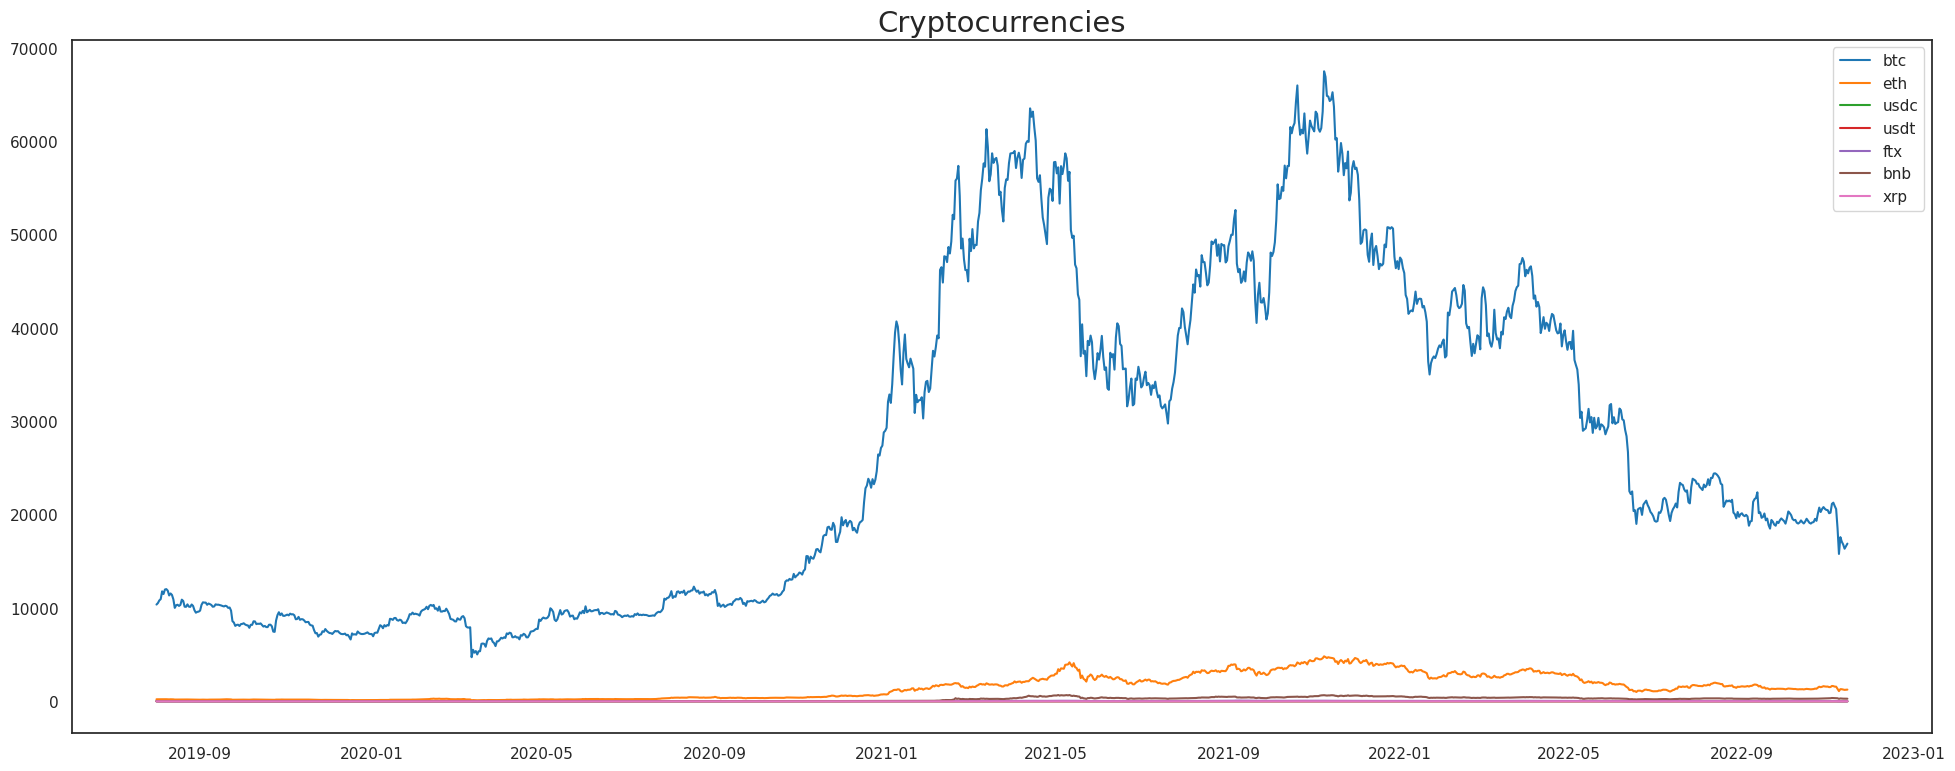

In [14]:
plt.figure(figsize=(24, 9))
for i in range(0, 7):
    plt.plot(coins.index, coins.iloc[:, i], label=coins.columns[i])

plt.title("Cryptocurrencies", fontsize=21)
plt.legend()
plt.show()

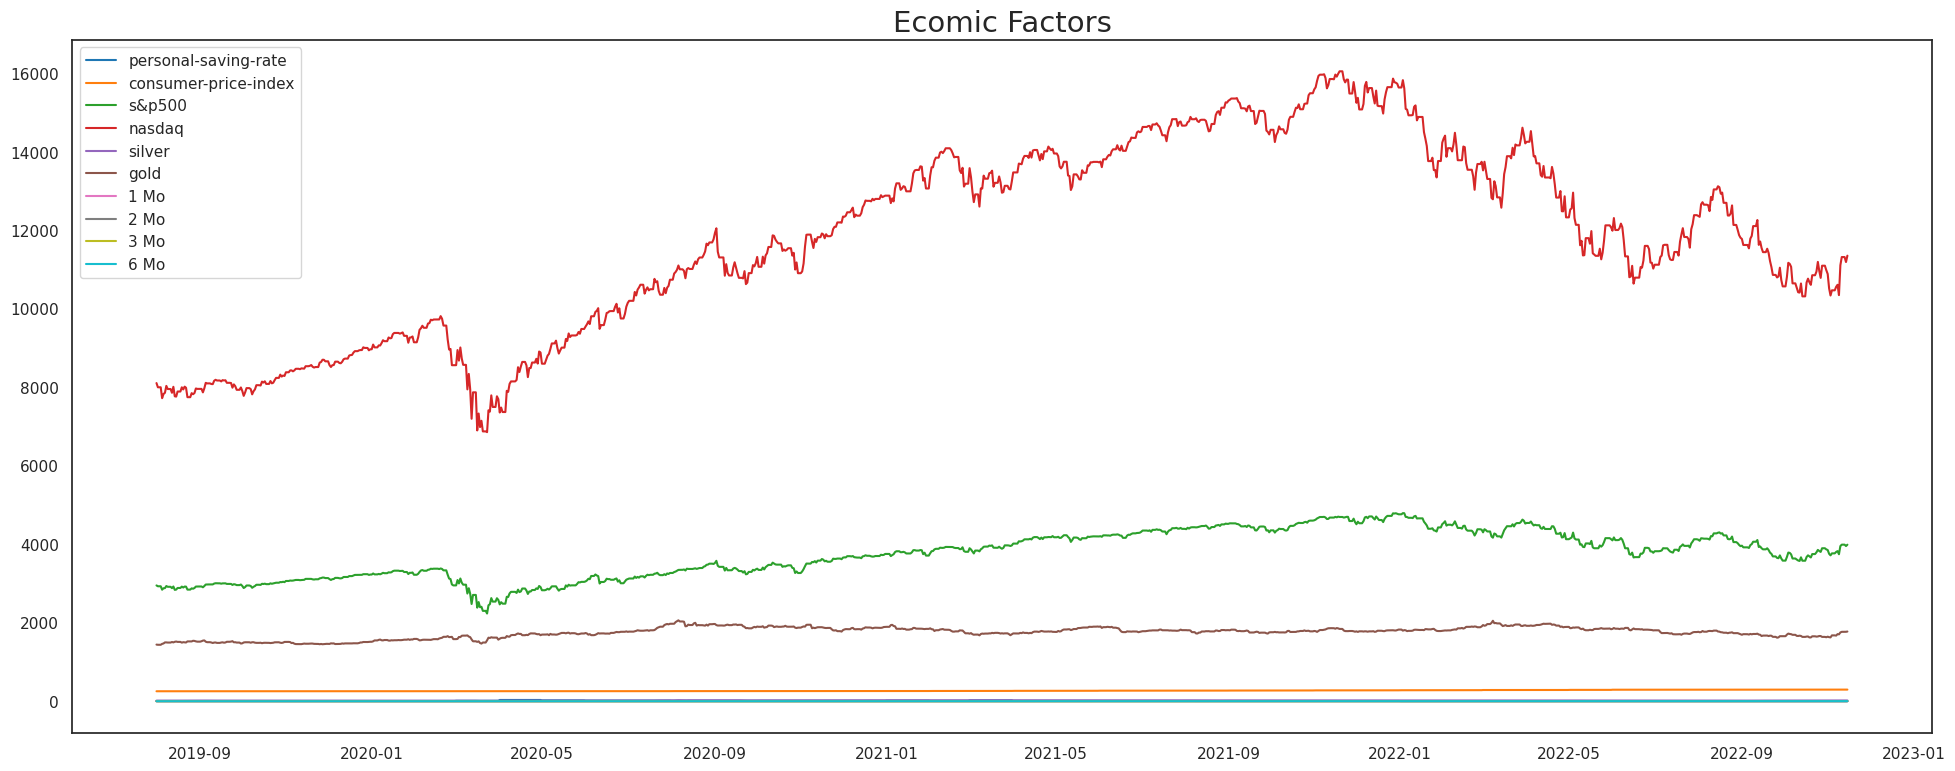

In [15]:
plt.figure(figsize=(24, 9))
for i in range(0, 10):
    plt.plot(factors.index, factors.iloc[:, i], label=factors.columns[i])

plt.title("Ecomic Factors", fontsize=21)
plt.legend()
plt.show()

---


# Creating Customize Index

We want to predict the index in this project, and at some time $t$, we will use a straightforward index method called **"Equal-Weighted Index."** This is just the average of the crypto.

Equal weight is a type of proportional measuring method that gives the same importance to each crypto in a portfolio, index, or index fund. So the smallest crypto is given equal statistical significance, or weight, to the largest crypto when it comes to evaluating the overall group's performance. The following equation can help us to achieve that goal.

$${V} = {({P}_{1}{W}_{1}) + ({P}_{2}{W}_{2}) + ... +({P}_{n}{W}_{n})}$$

- Index Value (${V}$): refer to the equal-weighted index.

- Price(${P}$): refer to the price of the crypto.

- Weight(${W}$): refer to assigned weight, but in an equal-weighted index, each weighting is 1/N, with N being the number of crypto within the index.


At the end of the project, we will use another technique called **"Capitalization-Weighted Index"** to customize the weight of each crypto based on your own portfolio.

In this stage, we can simply use <code>for</code> loop with the above equation to get the index values.


In [16]:
result = []

# calculate the index value
for i in range(len(coins.columns)):
    coin = coins[coins.columns[i]] / len(coins.columns)
    result.append(coin)
# assign index value with date
ew_index = pd.DataFrame(1 + pd.DataFrame(pd.concat(result, axis=1)).sum(axis=1))
ew_index.set_axis([*ew_index.columns[:-1], "Index"], axis=1, inplace=True)

ew_index.tail(3)

,Index
Date,
2022-11-13,2233.135291
2022-11-14,2270.497737
2022-11-15,2304.661041


Here we can use <code>seaborn</code> package to view each month's interquartile range of the index.


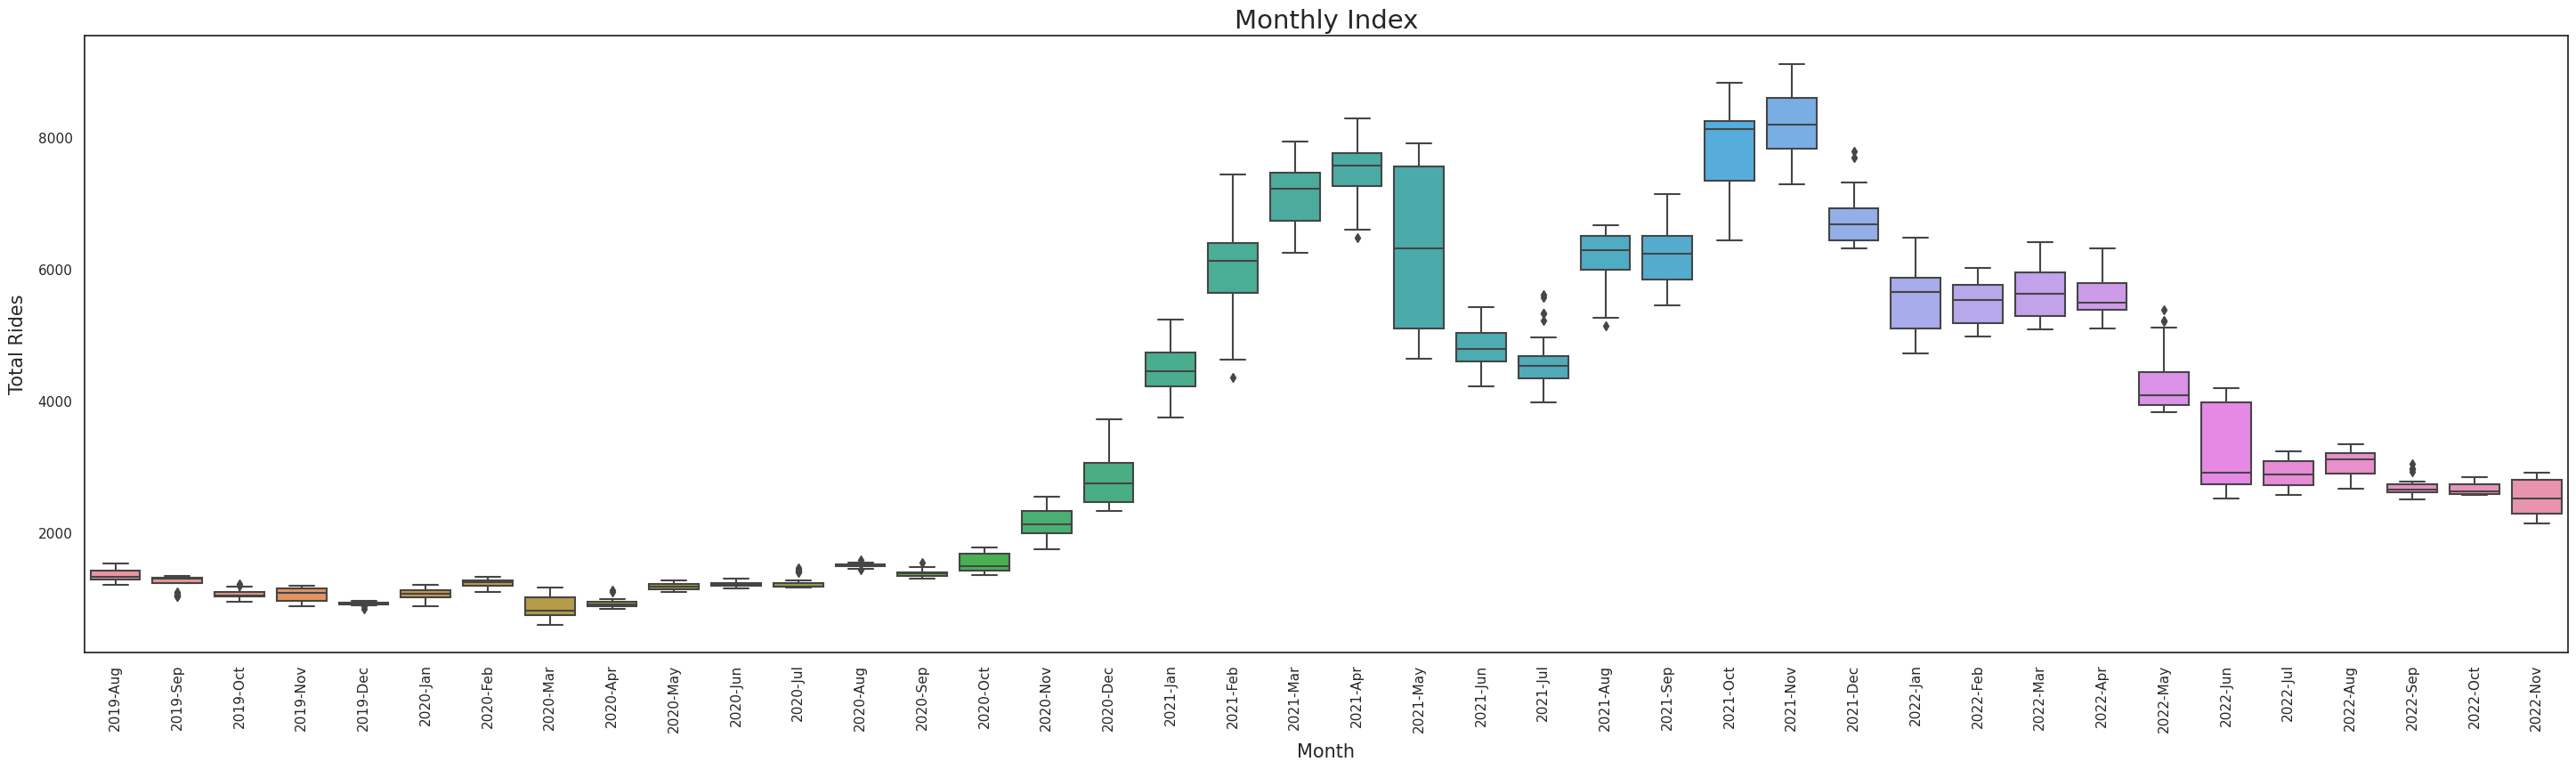

In [17]:
ts_fig, ts_ax = plt.subplots(figsize=(36, 9))
sns.boxplot(x=ew_index.index.strftime("%Y-%b"), y=ew_index.Index, ax=ts_ax)
ts_ax.set_xlabel("Month", labelpad=9, fontsize=15)
ts_ax.set_ylabel("Total Rides", labelpad=9, fontsize=15)
ts_ax.set_xticklabels(ts_ax.get_xticklabels(), rotation=90)
ts_ax.set_title("Monthly Index", fontsize=21)
plt.show()

Before we train the index data, we have to normalize the data and check the correlation between the target and predictor variables. You can find more compelling details here if you want to learn more about normalizing the data or finding the correlation: <a href="#How-To-Normalize-Variables?">How To Normalize Variables?</a> & <a href="#How-To-Find-Correlation-Between-Variables?">How To Find Correlation Between Variables?</a>

Now, let us combine the index values and predictor variables into one dataframe and use the function <code>prepare_data</code> to help us normalize the data and find the predictor variables that correlate with our index.


In [18]:
data = factors.merge(ew_index, how="left", left_on="Date", right_on="Date")

In [19]:
data_nor = prepare_data(data)

data_nor.tail(3)

,personal-saving-rate,consumer-price-index,s&p500,nasdaq,silver,gold,1 Mo,2 Mo,3 Mo,6 Mo,1 Yr,Index
Date,,,,,,,,,,,,
2022-11-13,0.003247,1.0,0.685979,0.485242,0.564939,0.529585,0.981481,0.975610,0.986175,0.978261,0.955882,0.190801
2022-11-14,0.003247,1.0,0.672037,0.471421,0.581829,0.531367,0.984127,0.987805,1.000000,0.984783,0.964286,0.195183
2022-11-15,0.003247,1.0,0.685510,0.489056,0.556785,0.541718,0.997354,1.000000,0.993088,0.982609,0.957983,0.199191


---


# Time Series Forecasting


## *What Is Time Series*

Time series is a numerical sequence of observations on an event taken sequentially in time and consists of two essential elements: time and value. The time element can be any time period like annually, quarterly, monthly, daily, hourly, or every minute. Yet, the most important thing is that the interval between the observations must be constant. The value element can be any observation, like hourly detection from a temperature sensor or a company's annual sales. For example, the time series of sales of a grocery store below is a period time series, which counts the total sales of the grocery store for each year within a one-year period.

<img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-GPXX0R8TEN/images/example.png" width="600">


## *How The Time Series Forecasting Works*

Time series forecasting is the process of analyzing time series data ${Y(t)}$ using statistics and models to make predictions and informed strategic decisions. In statistics, we call it Quantitative Forecasting. In a forecasting setting, we will find ourselves at time ${t}$, and we are interested in estimating ${Y(t+h)}$, using only information available at time ${t}$. There are many ways to achieve it, but in this guided project, we will only discuss the single-variable time series forecasts that use only the historical values from itself to predict future values, which means our forecasting models are based on Autoregression analysis.

Before we start building the time series forecasting model, we need to know that a given time series data is thought to consist of four systematic components, including **trend**, **seasonality**, **cyclicality**, and **noise**.

- Trend (${T}$): refers to series that exhibit a continuous upward or continuous downward trend over a considerable period of time

- Seasonality (${S}$): refers to the cyclical changes in indicator values due to seasonal shifts. Seasonal changes in indicator values are on an annual basis and are generally measured in weeks, months, or quarters, not in years

- Cyclicality(${C}$): differs from seasonal variation in that cyclic variation can occurs over a number of years

- Noise(${e}$): refers to the random variation in the series.


If the components might be independent with others, then we can consider the $${Additive \space Model}$$ 

$${y_t}= {T_t + S_t + C_t + e_t}$$

If the components might be dependent with others, then we can consider the $${Multiplicative \space Model}$$ 

$${y_t}= {T_t \times S_t \times C_t \times e_t}$$


Here we can simply use the function <code>decompose</code> to quickly decompose our time series data into those components.


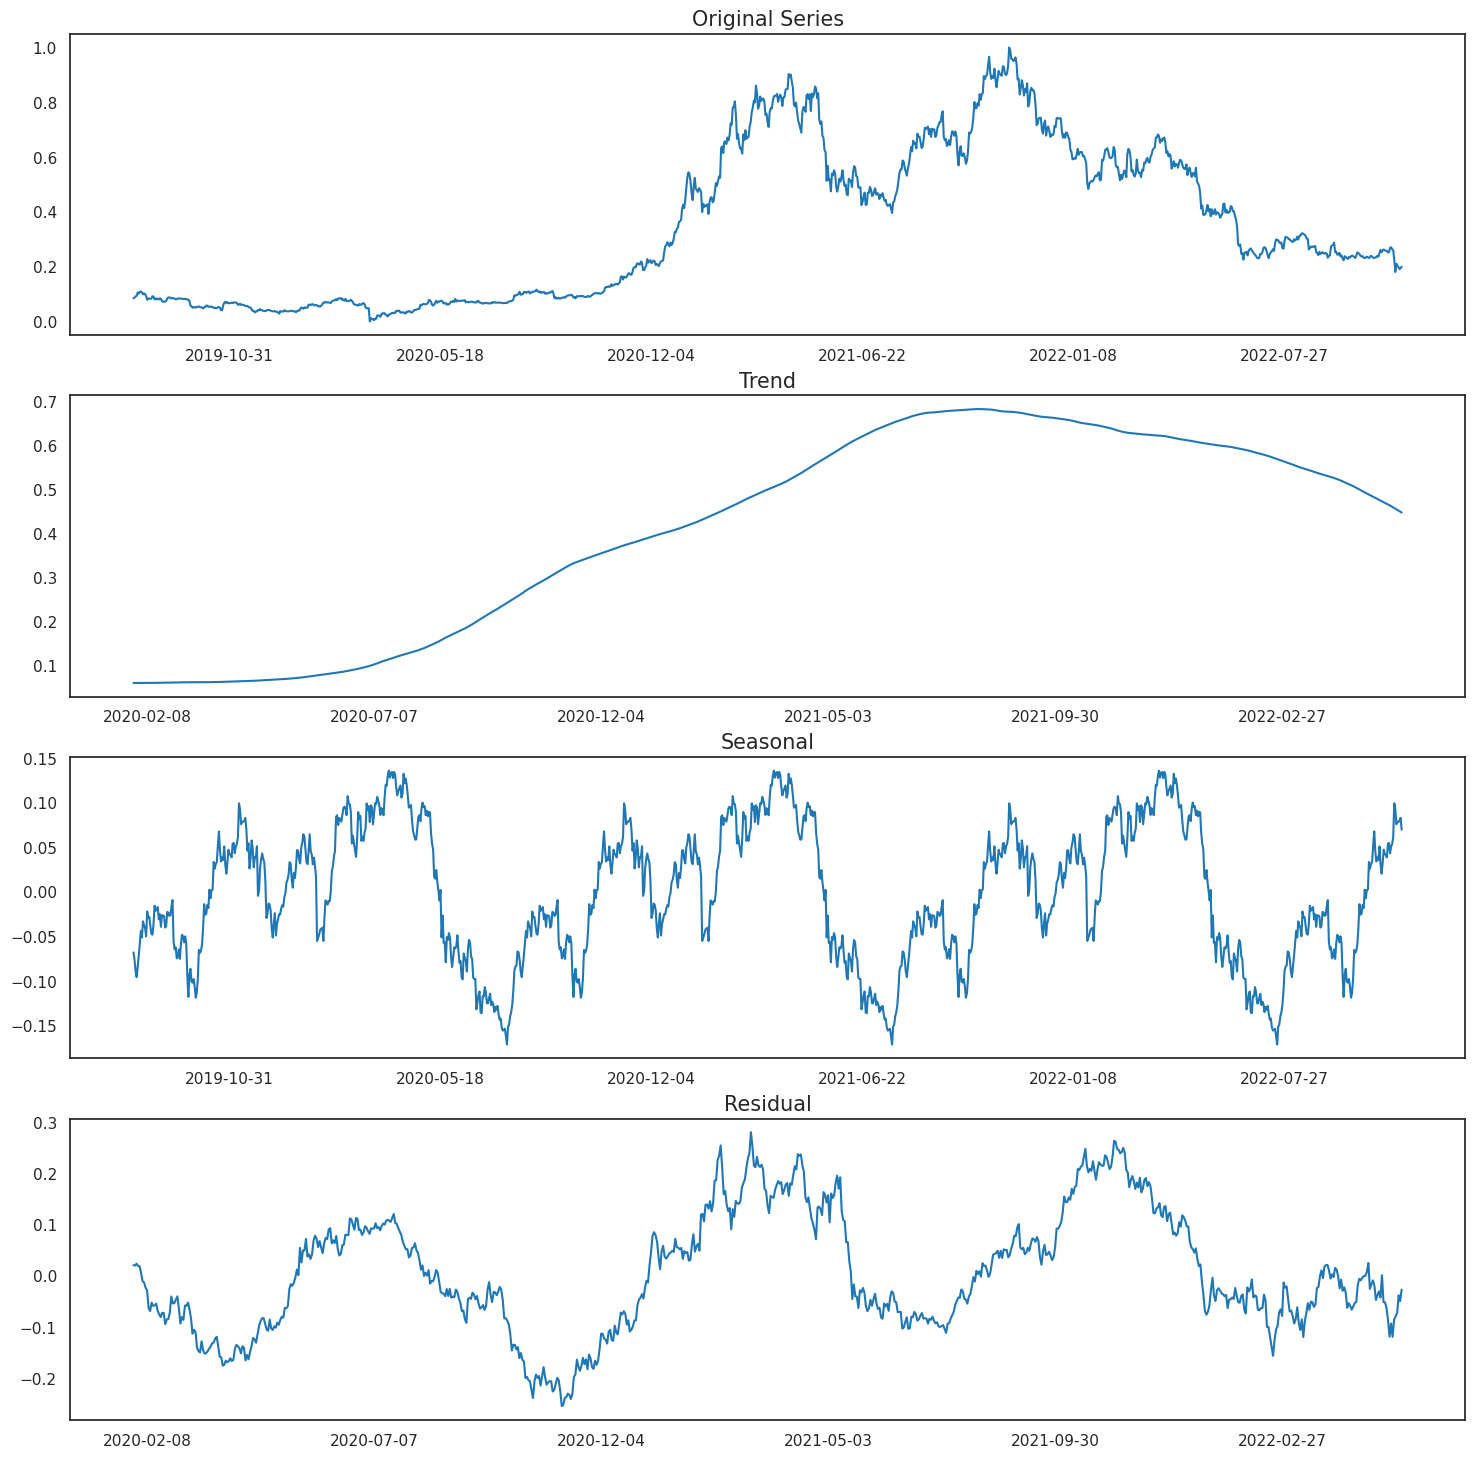

In [20]:
decompose(data_nor.Index, 365)

However, if you want to learn more about time series, you can find the fantastic course in <a href="https://www.coursera.org/professional-certificates/ibm-machine-learning?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkGuidedProjectsIBMGPXX0R8TEN1287-2023-01-01#howItWorks"> IBM Machine Learning Professional Certificate</a>.


## *Training and Testing Sets*

In machine learning, randomly splitting the data train/test is normal because there's no dependence from one observation to the other. Yet, It's not the case for the time series data. As we mentioned earlier, our forecasting models are based on Autoregression analysis, which means the time series data ${Y(t + h)}$ is correlated with its historical value ${Y(t)}$. Here, we'll want to use values at the rear of the dataset for testing and everything else for training.


Based on that assumption, we had 1203 records at daily intervals (almost 4 years); a good approach would be to keep the first 1143 records (3.1 years) for training and the last 60 records (2 months) for testing.


In [21]:
X_train, X_test, y_train, y_test = time_series_split(data_nor, 0.9505)

## *Implementing ARIMA Model*

One of the models we are about to use to predict our time series data is called Autoregressive Integrated Moving Average (**ARIMA**). As we can see from the name, this is a model made by two other models: autoregressive and moving average models. In this section, we will demonstrate how to use ARIMA models by adjusting the parameters in Python, yet if you are interested in learning how ARIMA works behind the code, you can find more exciting details here <a href="#What-Is-ARIMA-Model?">What Is ARIMA Model?</a>

As we known, there are 3 parameters that we can tune for the ARIMA model: `p`, `d`, `q`:

- $p$: stands for the number of past observations need to be included.

- $d$: stands for the number of differencing on observations to make a time series stationary.

- $q$: stands for the number of errors terms need to be included.


To find out the best parameters that suit our model. In this step, we will use one of the most powerful tools called `auto_arima` to help us find the p and q. We don't need to find d through this tool because we can use the stationary test to easily identify the order of differencing. You can find more information here to learn more about differencing: <a href="#How-To-Determine-Parameters-d?-Stationary-Detection">How To Determine Parameters d? Stationary Detection</a>

In this stage, we will set the parameter `d` at 1 and seasonal to __False__.


In [22]:
arima_param = auto_arima(y_train, start_p=1, d=1, start_q=1, max_p=5, max_q=5, trace=True, seasonal=False)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-5753.803, Time=0.34 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-5756.672, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-5755.802, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-5755.797, Time=0.13 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-5758.612, Time=0.05 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.657 seconds


Based on the result, we found that the best parameters for ARIMA models are when `p` and `q` equal 0. Then we can put these parameters into the model and start to train our model. In this stage, we will put the training dataset into the `ARIMA` and the parameters we got from `auto_arima` into `order`.


In [23]:
algorithm = ARIMA(y_train, order=arima_param.get_params()["order"])
model = algorithm.fit()

Finally, we can use the trained model to predict the testing data. Here we need to set the `steps` parameter as the length of the testing data. Then we can check the error rate of the model to ensure the model's performance.


In [24]:
# forecast the data
forecast = model.get_forecast(steps=len(y_test))
prediction = forecast.predicted_mean
ci = forecast.conf_int()

# check error rate
mse = mean_squared_error(y_test, prediction, squared=False)
rmse = mean_squared_error(y_test, prediction, squared=True)
print("The error rates of the ARIMA forecasting are: \nMSE = %f \nRMSE = %f" %(mse, rmse))

The error rates of the ARIMA forecasting are: 
MSE = 0.019946 
RMSE = 0.000398


Let us compare the forecasting results with the reality in the plot.


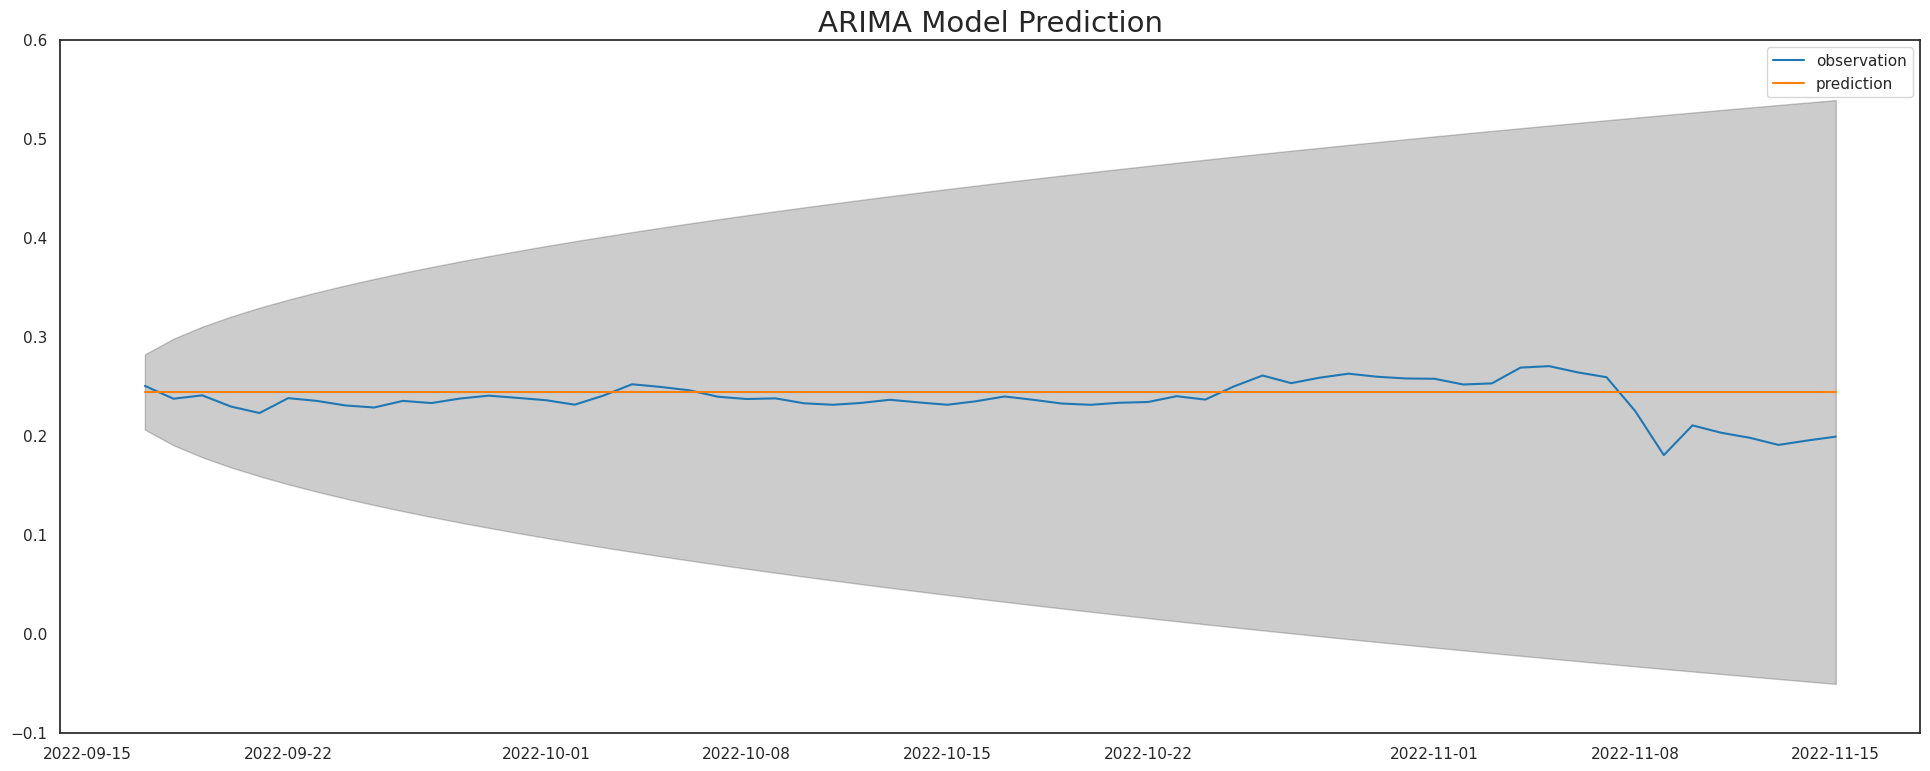

In [25]:
plt.figure(figsize=(24, 9))
plt.plot(y_test.index, y_test, label="observation")
plt.plot(prediction.index, prediction, label="prediction")
plt.fill_between(ci.index, ci.iloc[:, 0], ci.iloc[:, 1], color="k", alpha=0.2)
plt.ylim([-0.1, 0.6])
plt.title("ARIMA Model Prediction", fontsize=21)
plt.legend()
plt.show()

As the result of the ARIMA model, the error rate for predicting the 2 months index values is relatively low, but when we look at the chart, we can tell the reason the error rate is low because the prediction is based on the average line of the index value and **omits the randomness in the forecasting**.


## *Implementing SARIMAX Model*

The SARIMAX model's function is similar to the ARIMA model but adds two other elements: seasonality and external factors.

The key takeaway is that SARIMAX requires not only the `p`, `d`, and `q` arguments that ARIMA requires, but it also requires another set of `P`, `D`, and `Q` arguments for the seasonality aspect as well as an argument called "`m`." It is the periodicity of the data's seasonal cycle; in other words, it is the number of periods in each season. 

When choosing an m value, try to get an idea of when the seasonal data cycles. If a monthly basis separates your data points and the seasonal cycle is a year, then set `m` to 12. Or if a daily basis separates the data points and the seasonal cycle is a week, then make `s` equal to 7. Here is the table you can reference to adjust the `m` parameters.

|Seasonality|m|
|-|-|
|daily|7|
|weekly|52|
|monthly|12|
|quarterly|4|
|annually|1|

What we need to do next is to find out the best parameters that suit our model. In this step, we will use one of the most powerful tools called `auto_arima` to help us find the `p`, `q`, `P`, and `Q`. We don't need to find `d` through this tool because we already did the stationary test in the previous section, which means the `d` and `D` can be set at 1. Don't forget to put the __predictor variables (X_train)__ into `exogenous` and `seasonal` to __True__.


In [26]:
sarimax_param = auto_arima(y_train, exogenous=X_train, m=7, start_p=0, d=1, start_q=0, start_P=0, D=1, start_Q=0, max_p=3, max_q=1, max_P=3, max_Q=1, trace=True, seasonal=True)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[7]             : AIC=-4875.606, Time=0.18 sec
 ARIMA(1,1,0)(1,1,0)[7]             : AIC=-5232.037, Time=0.34 sec
 ARIMA(0,1,1)(0,1,1)[7]             : AIC=inf, Time=1.70 sec
 ARIMA(1,1,0)(0,1,0)[7]             : AIC=-4874.647, Time=0.11 sec
 ARIMA(1,1,0)(2,1,0)[7]             : AIC=-5366.197, Time=0.71 sec
 ARIMA(1,1,0)(3,1,0)[7]             : AIC=-5467.987, Time=1.23 sec
 ARIMA(1,1,0)(3,1,1)[7]             : AIC=inf, Time=10.70 sec
 ARIMA(1,1,0)(2,1,1)[7]             : AIC=inf, Time=3.67 sec
 ARIMA(0,1,0)(3,1,0)[7]             : AIC=-5467.389, Time=0.50 sec
 ARIMA(2,1,0)(3,1,0)[7]             : AIC=-5466.162, Time=2.61 sec
 ARIMA(1,1,1)(3,1,0)[7]             : AIC=-5464.099, Time=2.47 sec
 ARIMA(0,1,1)(3,1,0)[7]             : AIC=-5467.920, Time=0.90 sec
 ARIMA(2,1,1)(3,1,0)[7]             : AIC=-5464.312, Time=2.26 sec
 ARIMA(1,1,0)(3,1,0)[7] intercept   : AIC=-5465.982, Time=6.44 sec

Best model:  ARIMA(1,1,0)(3,1,0)[7]

Based on the result, we found that the best parameters for SARIMAX models are when `p` is 1, `q` is 0, `P` is 3, `Q` is 0. Then we can put these parameters into the model and start to train our model. In this stage, we will put the training dataset into the `SARIMAX` and the parameters we got from `auto_arima` into `order` and seasonal parameters into `seasonal_order`.


In [27]:
algorithm = SARIMAX(endog=y_train, exog=X_train, order=sarimax_param.get_params()["order"], seasonal_order=sarimax_param.get_params()["seasonal_order"])
model = algorithm.fit(disp=False)

Finally, we can use the trained model to predict the testing data. Here we need to set the `start` and `end` parameters as the length of the testing data and put all the external factors in the `exog` parameter. Then we can check the error rate of the model to ensure the model's performance.


In [28]:
# forecast the data
forecast = model.get_prediction(start=len(y_train), end=len(y_train)+len(y_test)-1, exog=X_test, dynamic=True)
prediction = forecast.predicted_mean
ci = forecast.conf_int()

# check error rate
mse = mean_squared_error(y_test, prediction, squared=False)
rmse = mean_squared_error(y_test, prediction, squared=True)
print("The error rates of the SARIMAX forecasting are: \nMSE = %f \nRMSE = %f" %(mse, rmse))

The error rates of the SARIMAX forecasting are: 
MSE = 0.027942 
RMSE = 0.000781


Let us compare the forecasting results with the reality in the plot.


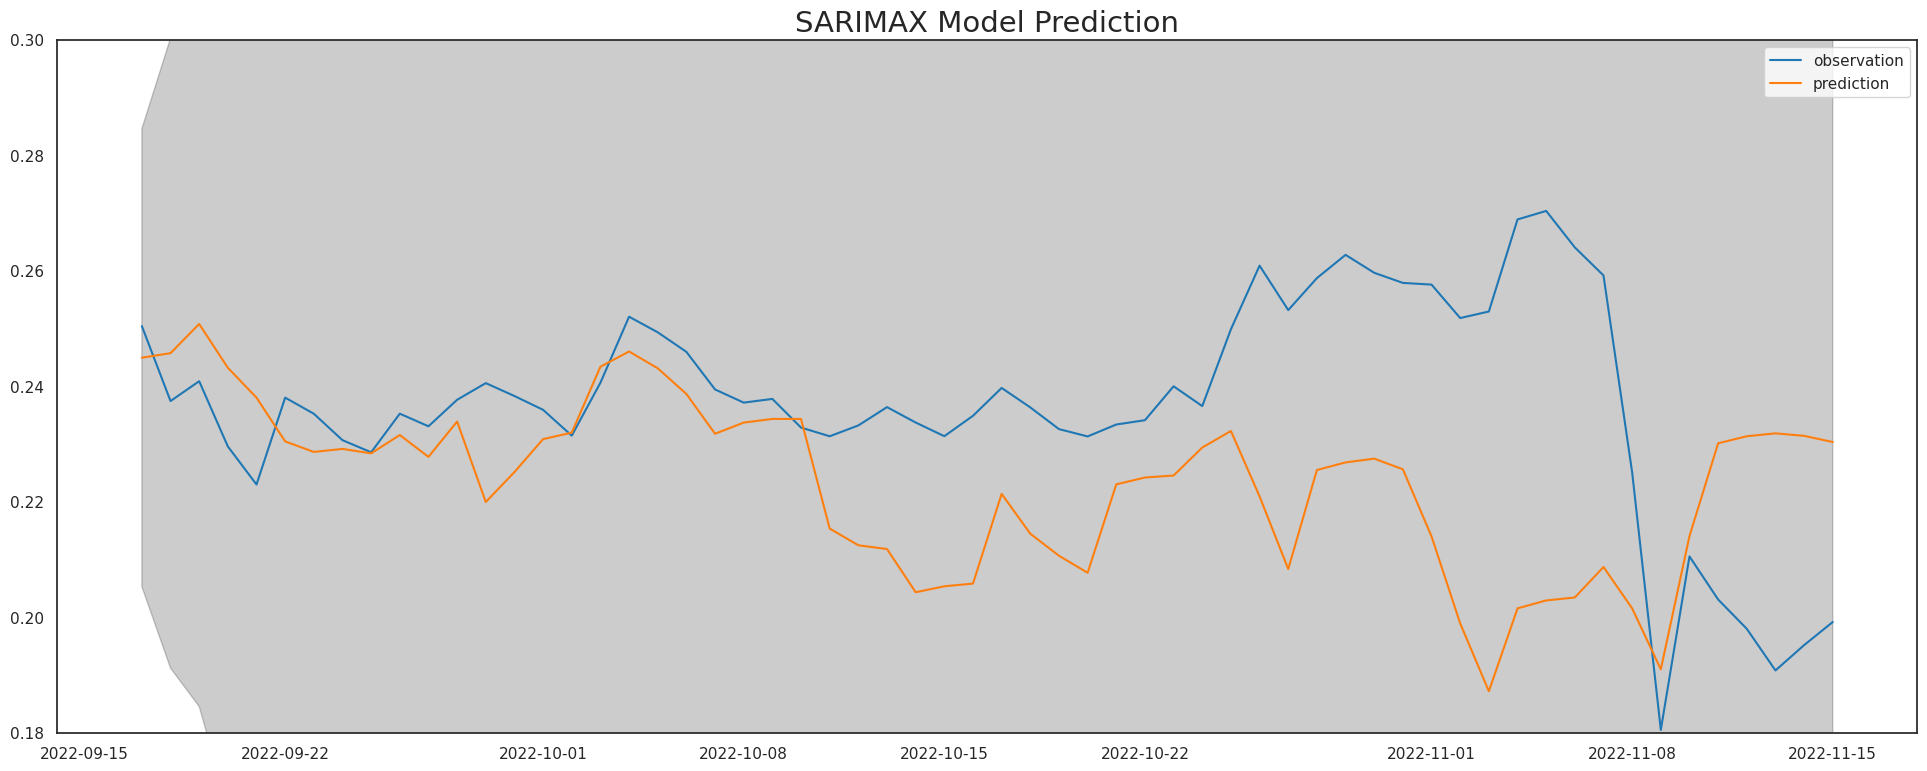

In [29]:
plt.figure(figsize=(24, 9))
plt.plot(y_test.index, y_test, label="observation")
plt.plot(prediction.index, prediction, label="prediction")
plt.fill_between(ci.index, ci.iloc[:, 0], ci.iloc[:, 1], color="k", alpha=0.2)
plt.ylim([0.18, 0.3])
plt.title("SARIMAX Model Prediction", fontsize=21)
plt.legend()
plt.show()

As the result of the SARIMAX model, the error rate for predicting the 2 months index values is relatively low but a bit higher than the ARIMA model. It is because we not only capture the seasonality of the data but also include external factors like consumer price index value or stock market index price to support the SARIMAX model. Therefore, when we look at the chart, we can tell the prediction is very close to the actual market movements and also catch the randomness in the forecasting except on November 11 when FTX suddenly filed for bankruptcy protection.


---


# Exercises: Forecasting Your Index With SARIMAX Model

In practice, we will use another index method called **"Capitalization-Weighted Index."** The advantage of this method is that the company with the crypto you invested the most will represent the most significant weight in the index, meaning the price of that crypto will impact the overall index's performance more than other cryptos will.

Capitalization weight shared the same formula with Equal weight as shown below:

$${V} = {({P}_{1}{W}_{1}) + ({P}_{2}{W}_{2}) + ... +({P}_{n}{W}_{n})} $$

Instead of assigning equal weight to each crypto, the weight will base on your portfolio's total value by the following formula:

$${W = \frac{Price \space of \space Crypto \times Quantity}{Total \space Value \space of \space Portfolio}}$$

As an exercise, let's start to forecast your index!


**Step 1:** upload your the current crypto prices data that you have invested in your protfolio as csv file to the `my_crypto` folder.

<img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-GPXX0R8TEN/images/exercise.png" width="600">


**Step 2:** read and clean your time series data.

_Note: makesure your csv files have "Date" and "Close" columns_


In [ ]:
# TODO
# TIPS: path = str(getcwd() + "/my_crypto/*.csv")


<details><summary>Click Here for Solution</summary>
    
```python

# read your data
my_coins = read_date_series_files(path, "2010-08-01", "2022-11-15", "left", ["Date", "Close"])

# find the command date in the data
find_first_date(my_coins)

# put all the data into same date
my_coins = my_coins[start_date:]

```
</details>


**Step 3:** create your capitalization-weighted index


In [ ]:
# TODO


<details><summary>Click Here for Solution</summary>
    
```python

def cw_index(investment_date, investment_volume, crypto_name):
    price = my_coins.loc[my_coins.index == investment_date]
    share = pd.DataFrame(columns=crypto_name)
    share.loc[0] = investment_volume
    total_value = sum([price.values * share.values][0][0])
    
    weight = pd.DataFrame(columns=crypto_name)
    weight.loc[0] = [price.values * share.values][0][0] / total_value
    
    return weight

# for example, you have invested in these cryptos since 08/08/2015 and never sold out or bought more:1 Bitcoin, 2 Ethereum, and 9000 on Dogecoin. 
w = cw_index("2018-09-01", [1, 60000, 12], ["btc", "doge", "eth"])

result = []
# calculate the index value
for i in range(len(my_coins.columns)):
    coin = my_coins[my_coins.columns[i]] * w[my_coins.columns[i]]
    result.append(my_coins)
# assign index value with date
my_index = pd.DataFrame(1 + pd.DataFrame(pd.concat(result, axis=1)).sum(axis=1))
my_index.set_axis([*my_index.columns[:-1], "Index"], axis=1, inplace=True)

```
</details>


**Step 4:** normalizing the data and checking correlation with predictor variables


In [ ]:
# TODO
# TIPS: we can first combine target variables and predictor variables into one dataframe


<details><summary>Click Here for Solution</summary>
    
```python

data = factors.merge(ew_index, how="left", left_on="Date", right_on="Date")

# normalized the data with min-max scaling
data_nor = pd.DataFrame(MinMaxScaler().fit_transform(data)).assign(label=data.index)
data_nor.columns = data.columns.to_list() + ["Date"]
data_nor.set_index("Date", inplace=True)

# remove the weak corellation (% between -0.2 to 0.2)
cor = data_nor.corr(method="pearson")
data_nor.drop(data_nor.columns[(cor.Index >= -0.2) & (cor.Index <= 0.2)], axis=1, inplace=True)

```
</details>


**Step 5:** split your data into training and testing sets


In [ ]:
# TODO


<details><summary>Click Here for Solution</summary>
    
```python

X_train, X_test, y_train, y_test = time_series_split(data_nor, 0.95)

```
</details>


**Step 6:** identifying the order of differencing for SARIMAX model


In [ ]:
# TODO


<details><summary>Click Here for Solution</summary>
    
```python

stationary(y_train)

```
</details>


**Step 7:** find the best parameters for SARIMAX model and put your training and testing sets into it.


In [ ]:
# TODO


<details><summary>Click Here for Solution</summary>
    
```python

# find the p, q, P, and Q parameters
sarima_param = auto_arima(y_train, exogenous=X_train, m=7,start_p=0, d=1, start_q=0, start_P=0, D=1, start_Q=0, max_p=3, max_q=1, max_P=3, max_Q=1, trace=True, seasonal=True)
# train the models
algorithm = SARIMAX(endog=y_train, exog=X_train[X_train.columns[[1, 3]]], order=sarima_param.get_params()["order"], seasonal_order=sarima_param.get_params()["seasonal_order"])
model = algorithm.fit(disp=False)
# forecast the data
forecast = model.get_prediction(start=len(y_train), end=len(y_train)+len(y_test)-1, exog=X_test[X_test.columns[[1, 3]]], dynamic=True)
prediction = forecast.predicted_mean
ci = forecast.conf_int()
# check error rate
mse = mean_squared_error(y_test, prediction, squared=False)
print("The error rates of the SARIMAX forecasting are: \nMSE = %f" %(mse))

# show the forecasting in plot
plt.figure(figsize=(24, 9))
plt.plot(y_test.index, y_test, label = "observation")
plt.plot(prediction.index, prediction, label = "prediction")
plt.fill_between(ci.index, ci.iloc[:, 0], ci.iloc[:, 1], color="k", alpha=0.2)
plt.ylim([-0.1, 0.6])
plt.title("SARIMAX Model Prediction", fontsize=21)
plt.legend()
plt.show()

```
</details>


---


# Optional: Deeper Understanding of Data Preprocessing

When we receive time series data, it is only sometimes in the required format. Most of the raw data either needs to be more organized or contains lots of missing values or dates, which makes it impossible for us to train the models. Therefore, understanding how to properly clean and correctly prepare the data is one of the significant skills for a data scientist.


## *How To Clean Missing Values?*

First, let us find out how many null values are in the crypto data.


In [ ]:
cryptos.isnull().sum()

As we can see from the above result, the FTX has the most null value. It is normal because the token was issued by the exchange FTX in July 2019. We need to find and set the first dates when all the cryptos have a price using the function <code>find_first_date</code>.


In [ ]:
find_first_date(cryptos)

In [ ]:
cryptos = cryptos[start_date:]

cryptos.tail(3)

Next, we can use the same method on the predictor variables.


In [ ]:
# set data to first date
predictor_variables = predictor_variables[start_date:]
# check for null
predictor_variables.isnull().sum()

Based on the result, we know all the columns contain a certain percentage of null values. It's because most of them only have value during the workday. Moreover, two of the economic indicators are monthly based. To transform this data into helpful information, we will first assume that during the missing days, most of them are either weekends or holidays, and the values remain the same from the day before. Based on this assumption, we can fill the missing date time with the previous day's values.

In addition, the U.S. Treasury Department just added the "4 months" into The Treasury Yield Curve Rates in October 2022. In this project, we will ignore this part because the data size is too small to train.


In [ ]:
predictor_variables.drop(["4 Mo"], axis=1, inplace=True)

In [ ]:
# fill missing datetime with previous day's values
predictor_variables = predictor_variables.reindex(pd.date_range(start_date, end_date)).reset_index().rename(columns={"index": "Date"})
predictor_variables = predictor_variables.groupby(predictor_variables["Date"].dt.time).ffill()
predictor_variables.set_index("Date", inplace=True)

predictor_variables.tail(3)

## *How To Normalize Variables?*

Now we finally have clean data that is ready to use. Before we start training the model with these data, one of the significant steps is ensuring all the data is normalized. Since both our target variables and predictor variables are measured on different scales, we must adjust values to a notionally standard scale in this section. There are many ways to achieve it, but this project will use one of the simplest methods, Min-Max Normalization, which consists of rescaling the range of features to scale the range in [0, 1].


In [ ]:
# normalized the data with min-max scaling
data_nor = pd.DataFrame(MinMaxScaler().fit_transform(data)).assign(label=data.index)
data_nor.columns = data.columns.to_list() + ["Date"]
data_nor.set_index("Date", inplace=True)

data_nor.tail(3)

## *How To Find Correlation Between Variables?*

Another necessary step before we start training the model with this data is to check the correlation between our target variables and predictor variables. We will use the Pearson correlation coefficient to analyze the correlation, and based on the following figure, we will remove the weak correlation variables (correlation coefficient between -0.2 to 0.2).


<img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-GPXX0R8TEN/images/correlation.png" width="600">


In [ ]:
data_nor.corr(method="pearson").style.background_gradient(cmap="coolwarm", axis=None).set_precision(2)

In [ ]:
# we will remove the weak corellation (% between -0.2 to 0.2)
cor = data_nor.corr(method="pearson")
data_nor.drop(data_nor.columns[(cor.Index >= -0.2) & (cor.Index <= 0.2)], axis=1, inplace=True)

data_nor.tail(3)

---


# Optional: Deeper Understanding of Time Series Forecasting


## *How To Determine Parameters d? Stationary Detection*

Stationary is a factor that describes the predictabilities of the time series data. The strict stationery describes the entire probability distribution as timeshift-invariant, and the weak stationary informs the mean and covariance are timeshift-invariant, which means the t moment of the value is highly dependent on its history. We'll use the function <code>stationary</code> to check whether the time series data is stationary.


In [ ]:
stationary(y_train)

To quickly check and get confirmatory evidence that our time series is either stationary or non-stationary. We will use one of the simple type statistical tests (**unit root test**) called the **Augmented Dickey-Fuller test**. 

In the hypothesis test, when

p-value > 0.05: Fail to reject the null hypothesis (${H_0}$), the time series data is non-stationary.

p-value <= 0.05: Reject the null hypothesis (${H_0}$), the time series data is stationary.


As a result, we can see that the p-value in our original time series is non-stationary because the p-value is 0.62, which is greater than 0.05. After the first order differencing, the time series data becomes stationary since the p-value is smaller than 0.05.


## *What Is ARIMA Model?*

As we can see from the name, this is a model made by two other models: autoregressive and moving average models.

The autoregressive model can forecast a time series ${y_t}$  based solely on the past **observations** ${y_{t-1} ,y_{t-2}, \cdot\cdot\cdot ,y_{t-p}}$  in the series, and the equation is 
$${y_t} = {c + \Phi_1y_{t-1} + \Phi_2y_{t-2} + \cdot\cdot\cdot + \Phi_py_{t-p} + \epsilon_t}$$

The moving average model can forecast a time series based solely on the past **errors** in the series, and the equation of moving average is:

$${y_t} = {c + \epsilon_t + \theta_1\epsilon_{t-1} + \theta_2\epsilon_{t-2} + \cdot\cdot\cdot + \theta_p\epsilon_{t-p}}$$

If we put both AR and MA models together with the first differencing, we will get the equation of the ARIMA model where the left part of the equation is autoregressive, and the right part of the equation is the moving average shown as follows:

$${y^{'}_t} = {c + \Phi_1y^{'}_{t-1} + \cdot\cdot\cdot + \Phi_py^{'}_{t-p} + \theta_1\epsilon_{t-1} + \cdot\cdot\cdot + \theta_p\epsilon_{t-p} + \epsilon_t}$$


- ${y_t}$: time series value at time t.

- ${{y_0}',...,{y_{t-2}}',{y_{t-1}}'}$: differenced time series values at time 0,…,t-2, t-1


---


# Congratulations! You have completed the lab


## Authors

<a href="https://www.linkedin.com/in/sheng-kai-chen?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkGuidedProjectsINDGPXX09KMEN1135-2022-01-01"> Sheng-Kai Chen</a> is a graduate student at the University of Toronto, concentrating on Information Systems & Design. Having several experiences analyzing data for retail stores and designing small software for small businesses, Sheng-Kai was inspired to shift toward answering new challenges with machine learning.

<a href="https://www.linkedin.com/in/joseph-s-50398b136/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2021-01-01"> Joseph Santarcangelo</a> has a Ph.D. in Electrical Engineering, his research focused on using machine learning, signal processing, and computer vision to determine how videos impact human cognition. Joseph has been working for IBM since he completed his PhD.


## Other Contributors


## Change Log

|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
|2020-12-19|0.2|Shengkai C. |Update the Structure|
|2020-11-08|0.1|Shengkai C. |Create Guided Project|


Copyright © 2022 IBM Corporation. All rights reserved.
